# DSM on SUPPORT Dataset

The SUPPORT dataset comes from the Vanderbilt University study
to estimate survival for seriously ill hospitalized adults.
(Refer to http://biostat.mc.vanderbilt.edu/wiki/Main/SupportDesc.
for the original datasource.)

In this notebook, we will apply Deep Survival Machines for survival prediction on the SUPPORT data.

### Load the SUPPORT Dataset

The package includes helper functions to load the dataset.

X represents an np.array of features (covariates),
T is the event/censoring times and,
E is the censoring indicator.

In [1]:
import sys

sys.path.append('../')
from auton_survival import datasets
outcomes, features = datasets.load_support()
print(features.shape)

(9105, 24)


In [2]:
from auton_survival.preprocessing import Preprocessor
cat_feats = ['sex', 'dzgroup', 'dzclass', 'income', 'race', 'ca']
num_feats = ['age', 'num.co', 'meanbp', 'wblc', 'hrt', 'resp', 
	     'temp', 'pafi', 'alb', 'bili', 'crea', 'sod', 'ph', 
             'glucose', 'bun', 'urine', 'adlp', 'adls']

features = Preprocessor().fit_transform(features, cat_feats=cat_feats, num_feats=num_feats)
print(features.shape)

(9105, 38)


### Compute horizons at which we evaluate the performance of DSM

Survival predictions are issued at certain time horizons. Here we will evaluate the performance
of DSM to issue predictions at the 25th, 50th and 75th event time quantile as is standard practice in Survival Analysis.

In [3]:
import numpy as np
horizons = [0.25, 0.5, 0.75]
times = np.quantile(outcomes.time[outcomes.event==1], horizons).tolist()
times

[14.0, 58.0, 252.0]

### Splitting the data into train, test and validation sets

We will train DSM on 70% of the Data, use a Validation set of 10% for Model Selection and report performance on the remaining 20% held out test set.

In [33]:
x, t, e = features.values, outcomes.time.values, outcomes.event.values

n = len(x)

tr_size = int(n*0.70)
vl_size = int(n*0.10)
te_size = int(n*0.20)

x_train, x_test, x_val = x[:tr_size], x[-te_size:], x[tr_size:tr_size+vl_size]
t_train, t_test, t_val = t[:tr_size], t[-te_size:], t[tr_size:tr_size+vl_size]
e_train, e_test, e_val = e[:tr_size], e[-te_size:], e[tr_size:tr_size+vl_size]

In [13]:
# visualize
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd

train_min = x_train.min(axis=0)
train_max = x_train.max(axis=0)
x_train = (x_train-train_min)/(train_max - train_min)

test_min = x_test.min(axis=0)
test_max = x_test.max(axis=0)
x_test = (x_test-test_min)/(test_max - test_min)

tsne = TSNE(n_components=2, init='pca')



/opt/homebrew/Caskroom/miniforge/base/envs/py38/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/py38/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


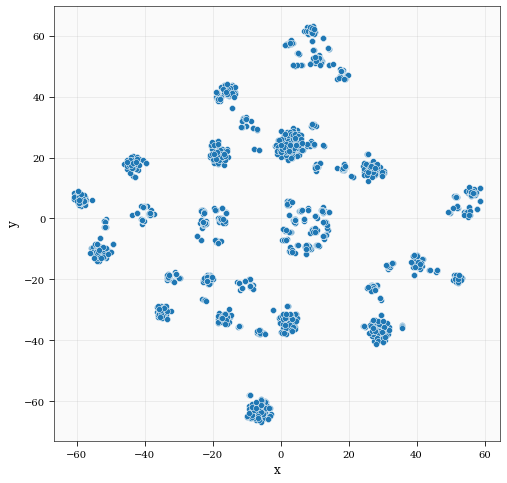

In [14]:
X_tsne = tsne.fit_transform(x_test)
df_tsne = pd.DataFrame(X_tsne, columns=["x", "y"])
%matplotlib inline

plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_tsne, x="x", y="y")
plt.show()

/opt/homebrew/Caskroom/miniforge/base/envs/py38/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/py38/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


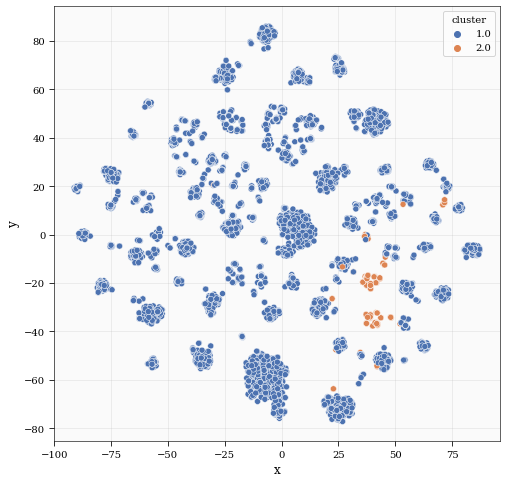

In [65]:
with open("../VaDE/pred_clusters_0.0001_128_3.npy", "rb") as f:
    xs = np.load(f)
    preds = np.load(f)

X_tsne = tsne.fit_transform(xs)

concat_X_pred = np.concatenate([X_tsne, np.expand_dims(preds, 1)], axis=1)
df_tsne = pd.DataFrame(concat_X_pred, columns=["x", "y", "cluster"])

%matplotlib inline

plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_tsne, x="x", y="y", hue="cluster", palette="deep")
plt.show()

/opt/homebrew/Caskroom/miniforge/base/envs/py38/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/py38/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


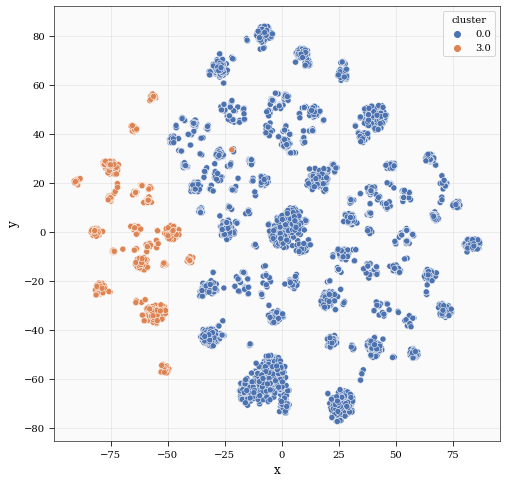

In [66]:
with open("../VaDE/pred_clusters_0.0001_128_4.npy", "rb") as f:
    xs = np.load(f)
    preds = np.load(f)

X_tsne = tsne.fit_transform(xs)

concat_X_pred = np.concatenate([X_tsne, np.expand_dims(preds, 1)], axis=1)
df_tsne = pd.DataFrame(concat_X_pred, columns=["x", "y", "cluster"])

%matplotlib inline

plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_tsne, x="x", y="y", hue="cluster", palette="deep")
plt.show()

/opt/homebrew/Caskroom/miniforge/base/envs/py38/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/py38/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


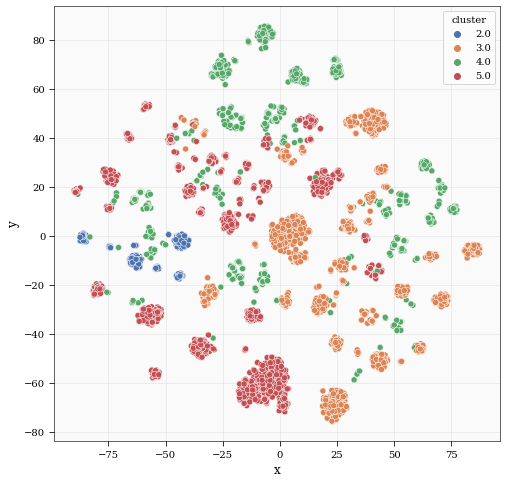

In [67]:
with open("../VaDE/pred_clusters_0.0001_128_6.npy", "rb") as f:
    xs = np.load(f)
    preds = np.load(f)

X_tsne = tsne.fit_transform(xs)

concat_X_pred = np.concatenate([X_tsne, np.expand_dims(preds, 1)], axis=1)
df_tsne = pd.DataFrame(concat_X_pred, columns=["x", "y", "cluster"])

%matplotlib inline

plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_tsne, x="x", y="y", hue="cluster", palette="deep")
plt.show()

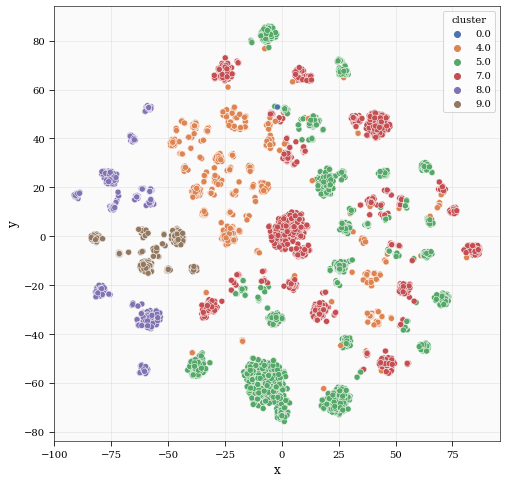

In [60]:
# lr=1e-4, batch_size=128
with open("../VaDE/pred_clusters_10.npy", "rb") as f:
    xs = np.load(f)
    preds = np.load(f)

X_tsne = tsne.fit_transform(xs)

concat_X_pred = np.concatenate([X_tsne, np.expand_dims(preds, 1)], axis=1)

df_tsne = pd.DataFrame(concat_X_pred, columns=["x", "y", "cluster"])

%matplotlib inline

plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_tsne, x="x", y="y", hue="cluster", palette="deep")
plt.show()

/opt/homebrew/Caskroom/miniforge/base/envs/py38/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/py38/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


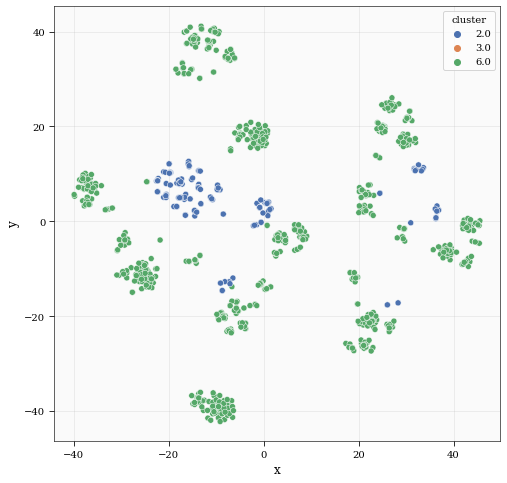

In [18]:
# lr=1e-4, batch_size=128
with open("../VaDE/pred_clusters_0.0001_128_10.npy", "rb") as f:
    xs = np.load(f)
    preds = np.load(f)

X_tsne = tsne.fit_transform(xs)

concat_X_pred = np.concatenate([X_tsne, np.expand_dims(preds, 1)], axis=1)

df_tsne = pd.DataFrame(concat_X_pred, columns=["x", "y", "cluster"])

%matplotlib inline

plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_tsne, x="x", y="y", hue="cluster", palette="deep")
plt.show()

/opt/homebrew/Caskroom/miniforge/base/envs/py38/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/py38/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


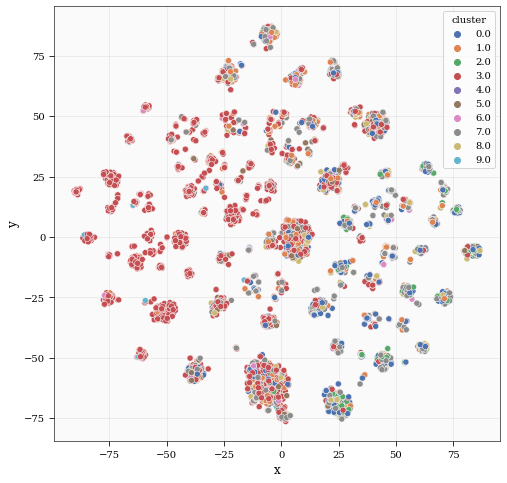

In [16]:
# DSM + VAE
with open("../VaDE/input_data_10.npy", "rb") as f:
    xs = np.load(f)
with open("../VaDE/cluster_label_10.npy", "rb") as f:
    preds = np.load(f)

X_tsne = tsne.fit_transform(xs)

concat_X_pred = np.concatenate([X_tsne, np.expand_dims(preds, 1)], axis=1)

df_tsne = pd.DataFrame(concat_X_pred, columns=["x", "y", "cluster"])

%matplotlib inline

plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_tsne, x="x", y="y", hue="cluster", palette="deep")
plt.show()

/opt/homebrew/Caskroom/miniforge/base/envs/py38/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/py38/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


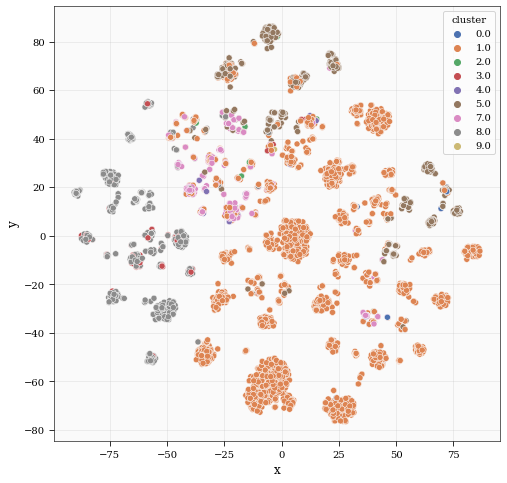

In [19]:
# DSM + VAE
with open("../VaDE/input_data.npy", "rb") as f:
    xs = np.load(f)
with open("../VaDE/cluster_label.npy", "rb") as f:
    preds = np.load(f)

X_tsne = tsne.fit_transform(xs)

concat_X_pred = np.concatenate([X_tsne, np.expand_dims(preds, 1)], axis=1)

df_tsne = pd.DataFrame(concat_X_pred, columns=["x", "y", "cluster"])

%matplotlib inline

plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_tsne, x="x", y="y", hue="cluster", palette="deep")
plt.show()

In [11]:
# data
print(x_train.shape)
print(x_train[0])

(6373, 38)
[ 1.27723305e-02 -1.39001299e+00  4.49837420e-01 -6.93182131e-01
 -8.92282509e-01 -1.38966796e-01 -8.81503590e-01  1.56901897e+00
 -1.65568634e+00 -5.23833658e-01 -3.39940577e-01  5.69190638e-01
  6.39607668e-01  0.00000000e+00  3.67098115e-16  4.57813372e-16
  5.44521044e+00  2.90375240e+00  1.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]


In [15]:
print(t_train.shape)
print(t_train[:10])

(6373,)
[2029    4   47  133 2029    4  659  142   63  370]


In [14]:
print(e_train.shape)
print(e_train[:10])

(6373,)
[0 1 1 1 0 1 1 1 1 1]


In [23]:
x_train = (x_train-x_train.min()) / (x_train.max()-x_train.min())
x_val = (x_val-x_val.min()) / (x_val.max()-x_val.min())

### Setting the parameter grid

Lets set up the parameter grid to tune hyper-parameters. We will tune the number of underlying survival distributions, 
($K$), the distribution choices (Log-Normal or Weibull), the learning rate for the Adam optimizer between $1\times10^{-3}$ and $1\times10^{-4}$ and the number of hidden layers between $0, 1$ and $2$.

In [5]:
from sklearn.model_selection import ParameterGrid

In [6]:
param_grid = {'k' : [3, 4, 6],
              'distribution' : ['LogNormal', 'Weibull'],
              'learning_rate' : [ 1e-4, 1e-3],
              'layers' : [ [], [100], [100, 100] ]
             }
params = ParameterGrid(param_grid)

### Model Training and Selection

In [20]:
from auton_survival.models.dsm import DeepSurvivalMachines


In [36]:
model = DeepSurvivalMachines(k = 10,
                            distribution = 'LogNormal',
                            layers=[100, 100])
model.fit(x_train, t_train, e_train, iters = 100, learning_rate = 1e-3)

  1%|          | 1/100 [00:00<00:10,  9.45it/s]

train loss 1.9222856744880912
valid loss 1.8866252114921165
train loss 1.8546578711925366
valid loss 1.8356005216011224
train loss 1.8150812007997659
valid loss 1.812016060747649


  5%|▌         | 5/100 [00:00<00:10,  9.20it/s]

train loss 1.8067636991475293
valid loss 1.7994409829582803
train loss 1.7973292134270307
valid loss 1.795670597796084
train loss 1.7861965954300765


  7%|▋         | 7/100 [00:00<00:10,  9.00it/s]

valid loss 1.7953647739565952
train loss 1.776191368777729
valid loss 1.7910393386378594


  9%|▉         | 9/100 [00:00<00:09,  9.15it/s]

train loss 1.776409376299868
valid loss 1.7964586557943387
train loss 1.7678482367500516
valid loss 1.7865813585506247


 11%|█         | 11/100 [00:01<00:09,  9.39it/s]

train loss 1.7566483987546648
valid loss 1.794127374960353
train loss 1.7526279722301765
valid loss 1.7928405830514533
train loss 1.7499534325399113


 13%|█▎        | 13/100 [00:01<00:08,  9.71it/s]

valid loss 1.798952631463858
train loss 1.7387991901109419
valid loss 1.8245830220447843
train loss 1.7341446339493083
valid loss 1.8113068753281778


 15%|█▌        | 15/100 [00:01<00:08,  9.97it/s]

train loss 1.7238017185293844
valid loss 1.8131673498300571
train loss 1.717895217310591
valid loss 1.8228864522905
train loss 1.7106076055547546
valid loss 1.8247150271028725


 16%|█▌        | 16/100 [00:01<00:10,  8.29it/s]


/opt/homebrew/Caskroom/miniforge/base/envs/py38/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/py38/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


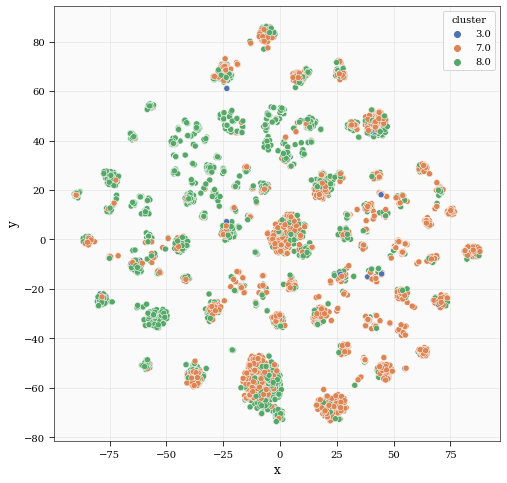

In [37]:

import torch

x_train_torch = torch.from_numpy(x_train)
_, _, z = model.torch_model.forward(x_train_torch, '1')
preds = z.argmax(dim=1)

x_train_norm = (x_train-x_train.min(0)) / (x_train.max(0) - x_train.min(0))
X_tsne = tsne.fit_transform(x_train_norm)

concat_X_pred = np.concatenate([X_tsne, np.expand_dims(preds, 1)], axis=1)

df_tsne = pd.DataFrame(concat_X_pred, columns=["x", "y", "cluster"])

%matplotlib inline

plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_tsne, x="x", y="y", hue="cluster", palette="deep")
plt.show()

In [30]:
x_val

tensor([[0.1345, 0.1867, 0.2299,  ..., 0.3115, 0.3115, 0.2593],
        [0.2674, 0.3033, 0.2922,  ..., 0.3115, 0.3115, 0.2593],
        [0.1419, 0.2255, 0.3413,  ..., 0.3115, 0.3115, 0.2593],
        ...,
        [0.2813, 0.3033, 0.3168,  ..., 0.3115, 0.3115, 0.2593],
        [0.3168, 0.1867, 0.2564,  ..., 0.3115, 0.3115, 0.2593],
        [0.2866, 0.2255, 0.3620,  ..., 0.3115, 0.2593, 0.2593]],
       dtype=torch.float64)

In [12]:
models = []
for param in params:
    model = DeepSurvivalMachines(k = param['k'],
                                 distribution = param['distribution'],
                                 layers = param['layers'])
    # The fit method is called to train the model
    model.fit(x_train, t_train, e_train, iters = 100, learning_rate = param['learning_rate'])
    models.append([[model.compute_nll(x_val, t_val, e_val), model]])
best_model = min(models)
model = best_model[0][1]

 14%|█▍        | 14/100 [00:00<00:05, 14.80it/s]


### Inference

In [11]:
out_risk = model.predict_risk(x_test, times)
out_survival = model.predict_survival(x_test, times)

### Evaluation

We evaluate the performance of DSM in its discriminative ability (Time Dependent Concordance Index and Cumulative Dynamic AUC) as well as Brier Score.

In [12]:
from sksurv.metrics import concordance_index_ipcw, brier_score, cumulative_dynamic_auc

In [15]:
cis = []
brs = []

et_train = np.array([(e_train[i], t_train[i]) for i in range(len(e_train))],
                 dtype = [('e', bool), ('t', float)])
et_test = np.array([(e_test[i], t_test[i]) for i in range(len(e_test))],
                 dtype = [('e', bool), ('t', float)])
et_val = np.array([(e_val[i], t_val[i]) for i in range(len(e_val))],
                 dtype = [('e', bool), ('t', float)])

for i, _ in enumerate(times):
    cis.append(concordance_index_ipcw(et_train, et_test, out_risk[:, i], times[i])[0])
brs.append(brier_score(et_train, et_test, out_survival, times)[1])
roc_auc = []
for i, _ in enumerate(times):
    roc_auc.append(cumulative_dynamic_auc(et_train, et_test, out_risk[:, i], times[i])[0])
for horizon in enumerate(horizons):
    print(f"For {horizon[1]} quantile,")
    print("TD Concordance Index:", cis[horizon[0]])
    print("Brier Score:", brs[0][horizon[0]])
    print("ROC AUC ", roc_auc[horizon[0]][0], "\n")

For 0.25 quantile,
TD Concordance Index: 0.7536960685341209
Brier Score: 0.11173826045047792
ROC AUC  0.7591061994134036 

For 0.5 quantile,
TD Concordance Index: 0.6953761315005818
Brier Score: 0.18365831000064445
ROC AUC  0.7165843469497761 

For 0.75 quantile,
TD Concordance Index: 0.64680915208249
Brier Score: 0.22389827874982274
ROC AUC  0.6946652935118435 

